# Team Name: Data Scouts
### Team Members:
 
 -  Sai Harika Paluri                                                          
 -  Nikhil Kumar Mutyala                                              
 -  Sree Divya Keerthi Paravasthu Siddanthi                                     
 -  Ravi Theja Goalla   
 
 
#  Project Title: Price prediction in ride-hailing services based on weather conditions

## Project Description:
Uber and Lyft's ride prices are not constant like public transport. They are greatly affected by the demand and supply of rides at a given time. So what exactly drives this demand? The first guess would be the time of the day; times around 9 am and 5 pm should see the highest surges on account of people commuting to work/home. Another guess would be the weather; rain/snow should cause more people to take rides.

The data is approx. for a week of Nov '18 ( I actually have included data collected while I was testing the 'querying' application so might have data spread out over more than a week. I didn't consider this as a time-series problem so did not worry about regular interval. The chosen interval was to query as much as data possible without unnecessary redundancy. So data can go from end week of Nov to few in Dec)
The Cab ride data covers various types of cabs for Uber & Lyft and their price for the given location. You can also find if there was any surge in the price during that time. Weather data contains weather attributes like temperature, rain, cloud, etc for all the locations taken into consideration.

#  DATA

## Source of Data

We have acquired this dataset from  kaggle https://www.kaggle.com/ravi72munde/uber-lyft-cab-prices.

## Description of Data

The dataset contains 10 features along with the price for 693071 observations. Later we add few more derived features to this dataset.<br>The date is in timestamp format. So we change that timestamp into date format, the date attribute is added to the dataset and timestamp attribute is removed. Few attributes are added like hour, fare_per_mile. The description for the 10 features is given below:<br>

 <style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>Distance</td>
    <td>Distance between source and destination of the cab ride</td>
    </tr>
  <tr>
    <td>cab_type</td>
    <td>The type of uber car or lyft booked.</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>destination</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>source</td>
    <td>The source of a cab ride</td>
    </tr>
  <tr>
    <td>price</td>
    <td>Total estimated price of the cab ride.</td>
    </tr><tr>
    <td>name</td>
    <td>Name of the Uber/Lyft product</td>
    </tr>
    <tr>
    <td>Surge_multiplier</td>
    <td>This is the factor by which a normal cab fare is multiplied.If it is 1 it means that there is no surge.</td>
    </tr>
    <tr>
    <td>id</td>
    <td>Unique id per ride</td>
    </tr>
    <tr>
    <td>product_id</td>
    <td>Unique id of a particular product of Lyft or Uber. </td>
    </tr>
</table>

The other dataset we are merging with cabs_rides is weather_data.We have 8 features and 6276 entries in this.We use time_stamp feature to merge with the cab_rides data. 

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
        }
td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}
</style>
  <table>
  <tr>
    <th>Feature</th>
    <th>Description</th>
    </tr>
  <tr>
    <td>temp</td>
    <td>Average temperature for a particular day</td>
    </tr>
  <tr>
    <td>location</td>
    <td>Aread in boston where the temperature was recorded.</td>
    </tr>
  <tr>
    <td>clouds</td>
    <td>Measured timestamp</td>
    </tr>
  <tr>
    <td>pressure</td>
    <td>The destination of the cab ride</td>
    </tr>
  <tr>
    <td>rain</td>
    <td>Amount of precipitation</td>
    </tr>
  <tr>
    <td>time_stamp</td>
    <td>Measured timestamp in a day</td>
    </tr>
    <tr>
    <td>Humidity</td>
    <td>Humidity percentage in the climate.</td>
    </tr>
    <tr>
    <td>Wind</td>
    <td>Wind speed recorded for a particular day</td>
    </tr>
    </table>



# CRISM-DM PROCESS

## Importing the dataset

In [4]:
#Importing the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [5]:
#Importing our dataset
df_cab=pd.read_csv('cab_rides.csv')
#Creating an index label for the dataset
df_cab.reset_index(drop=True, inplace=True)

 We need to identify the charecteristics of our dataset .For this we use three methods:-             
 info()-Used for identifying the different features and data types in a dataset.<br>
 shape()-We used this method to get an idea of  the rows and columns in a dataframe.<br>
 head()-We  used this method to examine the First few rows of a dataset<.br>
 describe()-We used this method to identify the summary statistic.

In [3]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [4]:
df_cab.shape

(693071, 10)

In [5]:
df_cab = df_cab.iloc[0:10000, :]
df_cab.shape

(10000, 10)

In [6]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux


In [7]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,10000.00000,1.000000e+04,9227.000000,10000.000000
mean,2.13824,1.544030e+12,16.324753,1.012875
std,1.12805,6.854128e+08,9.137386,0.089114
min,0.30000,1.543207e+12,2.500000,1.000000
25%,1.25000,1.543439e+12,9.000000,1.000000
50%,2.05000,1.543727e+12,13.500000,1.000000
75%,2.86000,1.544811e+12,22.500000,1.000000
max,7.46000,1.545161e+12,67.500000,2.500000


# DATA CLEANING  AND PREPROCCESSING

For data cleaning these are the steps we followed:-<br>
1.Identified the null values in our dataset.<br>
2.Identified the count's of different features.<br>
3.Imputation of the null  price column with far per pile.

In [8]:
df_cab.isnull().sum()

distance              0
cab_type              0
time_stamp            0
destination           0
source                0
price               773
surge_multiplier      0
id                    0
product_id            0
name                  0
dtype: int64

In [9]:
df_cab['cab_type'].value_counts()

Uber    5427
Lyft    4573
Name: cab_type, dtype: int64

In [10]:
df_cab['destination'].value_counts()

Northeastern University    971
North End                  958
Fenway                     889
North Station              849
Beacon Hill                837
West End                   824
Boston University          803
Back Bay                   790
Haymarket Square           788
South Station              786
Theatre District           763
Financial District         742
Name: destination, dtype: int64

In [11]:
df_cab['source'].value_counts()

North Station              954
Theatre District           920
Back Bay                   905
North End                  865
Fenway                     855
Financial District         844
Haymarket Square           842
West End                   807
South Station              797
Beacon Hill                765
Northeastern University    750
Boston University          696
Name: source, dtype: int64

In [12]:
df_cab['surge_multiplier'].value_counts()

1.00    9722
1.25     150
1.50      58
1.75      35
2.00      33
2.50       2
Name: surge_multiplier, dtype: int64

In [13]:
df_cab['name'].value_counts()

Black           781
UberPool        778
Black SUV       776
UberXL          775
UberX           774
Taxi            773
WAV             770
Shared          769
Lux Black XL    766
Lux             762
Lyft XL         762
Lyft            757
Lux Black       757
Name: name, dtype: int64

In [14]:
import datetime
#convert 13digit time stamp to datetime format
df_cab['time']= pd.to_datetime(df_cab['time_stamp']/1000, unit='s')
df_cab['date']= df_cab['time'].dt.date
#extract hours only
df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

In [15]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time,date,fare_per_mile
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,11.36
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,2018-11-27,25.00


In [16]:
del df_cab['time_stamp']

In [17]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
distance            10000 non-null float64
cab_type            10000 non-null object
destination         10000 non-null object
source              10000 non-null object
price               9227 non-null float64
surge_multiplier    10000 non-null float64
id                  10000 non-null object
product_id          10000 non-null object
name                10000 non-null object
time                10000 non-null datetime64[ns]
date                10000 non-null object
fare_per_mile       9227 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 937.6+ KB


In [21]:

df_cab['fare_per_mile']=df_cab['fare_per_mile'].astype(float)
df_cab['fare_per_mile'].fillna('2.8',inplace=True)
df_cab['price'] = df_cab['fare_per_mile']*df_cab['distance']

In [22]:
df_cab.price.isnull().sum()

0

In [23]:
df_cab

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time,date,fare_per_mile
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.00,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,11.36
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.00,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,2018-11-27,25.00
2,0.44,Lyft,North Station,Haymarket Square,7.0004,1.00,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954,2018-11-28,15.91
3,0.44,Lyft,North Station,Haymarket Square,25.9996,1.00,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,2018-11-30,59.09
4,0.44,Lyft,North Station,Haymarket Square,8.9980,1.00,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050,2018-11-29,20.45
5,0.44,Lyft,North Station,Haymarket Square,16.5000,1.00,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,2018-12-17 18:25:12.138000011,2018-12-17,37.50
6,1.08,Lyft,Northeastern University,Back Bay,10.4976,1.00,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL,2018-11-26 05:03:00.200000048,2018-11-26,9.72
7,1.08,Lyft,Northeastern University,Back Bay,16.5024,1.00,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black,2018-12-02 19:53:04.677000046,2018-12-02,15.28
8,1.08,Lyft,Northeastern University,Back Bay,3.0024,1.00,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared,2018-12-03 06:28:02.644999981,2018-12-03,2.78
9,1.08,Lyft,Northeastern University,Back Bay,27.4968,1.00,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL,2018-11-27 10:45:22.249000072,2018-11-27,25.46


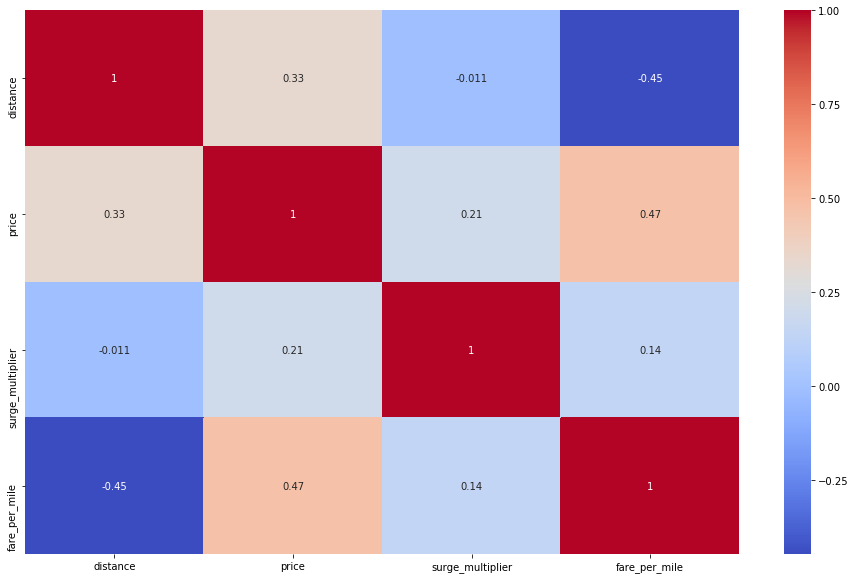

In [24]:
df_corr = df_cab.corr()
plt.figure( figsize = (16,10))
sns.heatmap(df_corr, cmap = 'coolwarm',annot = True)

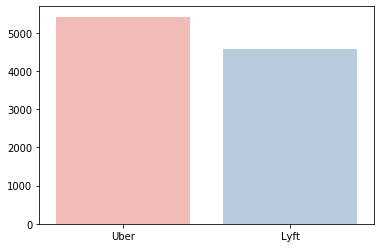

In [25]:
x=['Uber','Lyft']
y = [df_cab.cab_type[(df_cab.cab_type)=='Uber'].count(),df_cab.cab_type[(df_cab.cab_type)=='Lyft'].count()]
vis1= sns.barplot(x,y,palette='Pastel1')

In [26]:
df_weather=pd.read_csv('weather.csv')
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [27]:
df_weather['time']= pd.to_datetime(df_weather['time_stamp'], unit='s')
df_weather['date']=df_weather['time'].dt.date


In [28]:
df_merged= pd.merge(df_cab,df_weather, right_on='date',left_on='date',how='left')

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4686132 entries, 0 to 4686131
Data columns (total 21 columns):
distance            float64
cab_type            object
destination         object
source              object
price               float64
surge_multiplier    float64
id                  object
product_id          object
name                object
time_x              datetime64[ns]
date                object
fare_per_mile       float64
temp                float64
location            object
clouds              float64
pressure            float64
rain                float64
time_stamp          int64
humidity            float64
wind                float64
time_y              datetime64[ns]
dtypes: datetime64[ns](2), float64(10), int64(1), object(8)
memory usage: 786.6+ MB


In [30]:
df_merged['rain'].fillna(0,inplace=True)
df_X = df_merged[['distance','temp','clouds', 'pressure','humidity', 'wind', 'rain']]
df_y = df_merged[['price']]

In [31]:
print(df_X.count())
print(df_y.count())

distance    4686132
temp        4686132
clouds      4686132
pressure    4686132
humidity    4686132
wind        4686132
rain        4686132
dtype: int64
price    4686132
dtype: int64


In [32]:
print('Means:', df_X.mean())
print('Standard Deviations:', df_X.std())

Means: distance       2.132735
temp          39.320214
clouds         0.675533
pressure    1005.301720
humidity       0.764752
wind           7.363777
rain           0.011323
dtype: float64
Standard Deviations: distance     1.127462
temp         5.537136
clouds       0.310691
pressure    12.967661
humidity     0.121088
wind         3.511178
rain         0.052110
dtype: float64
